In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime
import os

In [2]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
bboxes = pd.read_csv('./archive/bboxes.csv')

In [4]:
bboxes.head()

,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009fd.jpg,340,301,408,385,hill_mustard
0,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,45,60,101,135,hill_mustard
1,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,0,84,55,168,hill_mustard
2,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,371,62,414,146,hill_mustard
3,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,327,22,385,97,hill_mustard
4,---------------------197_jpg.rf.76bee11dd0c1c8...,148,124,342,406,fireweed


In [5]:
bboxes = pd.DataFrame(np.insert(bboxes.values , 0, values=bboxes.columns, axis= 0 ))
bboxes.columns = ['pollen_name', 'a', 'b', 'c', 'd', 'pollen_type']
bboxes.head()

,pollen_name,a,b,c,d,pollen_type
0,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,340,301,408,385,hill_mustard
1,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,45,60,101,135,hill_mustard
2,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,0,84,55,168,hill_mustard
3,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,371,62,414,146,hill_mustard
4,443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009f...,327,22,385,97,hill_mustard


In [6]:
class_map = pd.read_csv('./archive/class_map.csv')

In [7]:
class_map.head(15)

,buckwheat,0
0,clover,1
1,angelica,2
2,angelica_garden,3
3,willow,4
4,hill_mustard,5
5,linden,6
6,meadow_pink,7
7,alder,8
8,birch,9
9,fireweed,10


In [8]:
class_map = pd.DataFrame(np.insert(class_map.values , 0, values=class_map.columns, axis= 0 ))
class_map.columns = ['pollen_type-name', 'pollen_num']
class_map.head()

,pollen_type-name,pollen_num
0,buckwheat,0
1,clover,1
2,angelica,2
3,angelica_garden,3
4,willow,4


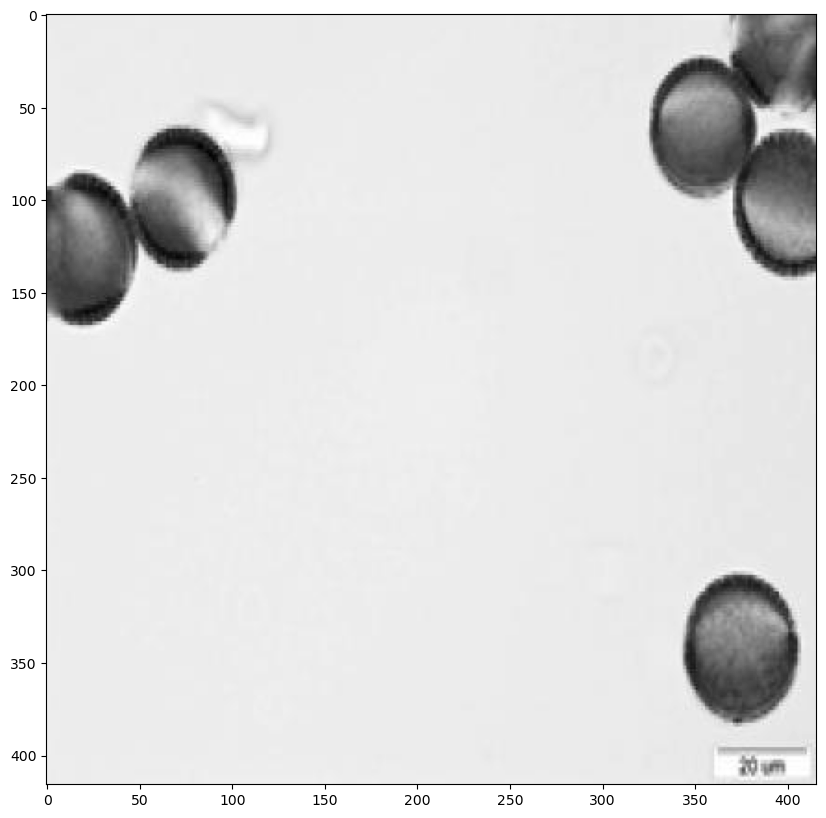

In [9]:
sample_image = cv2.imread('./archive/images/443_png_jpg.rf.76a9b2e007453a66c8ffd722dbc009fd.jpg')
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10)) 
plt.imshow(image, cmap = 'gray')
plt.show()

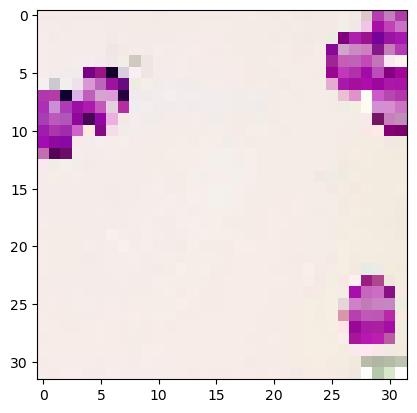

In [10]:
sample_image = cv2.resize(sample_image, (32, 32))
plt.imshow(sample_image, cmap = 'gray')
plt.show()

In [11]:
pixels = sample_image.flatten()
pixels

array([244, 235, 232, ..., 255, 253, 254], dtype=uint8)

Repeat the process above for all images

In [12]:
image_paths = list(paths.list_images('./archive/images'))
train_images = []
train_labels = []

In [13]:
img = image_paths[0].replace("./archive/images\\", '')
ptype = bboxes[bboxes["pollen_name"] == img]["pollen_type"].values[0]
pnum = class_map[class_map["pollen_type-name"] == ptype]["pollen_num"].values[0]

In [ ]:
for (i, image_path) in enumerate(image_paths):
    ""
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    
    image = cv2.resize(image, (32, 32))
    
    pixels = image.flatten()
    
    train_images.append(pixels)
    
    img = image_paths[i].replace("./archive/images\\", '')
    print(img)
    ptype = bboxes[bboxes["pollen_name"] == img]["pollen_type"].values[0]
    print(ptype)
    pnum = class_map[class_map["pollen_type-name"] == ptype]["pollen_num"].values[0]
    print(pnum)
    print(f"----{i}-----")
    
    train_labels.append(pnum)

---------------------100_jpg.rf.93077deff26c9ada1149c33c74da96b9.jpg
fireweed
10
----0-----
---------------------101_jpg.rf.3b026d04c8904e6183296ca962709bf8.jpg
fireweed
10
----1-----
---------------------102_jpg.rf.22469e4957a2107f673d8b0ba17f1190.jpg
fireweed
10
----2-----
---------------------103_jpg.rf.71e0ee12c814d46913c06ce56b66549b.jpg
fireweed
10
----3-----
---------------------104_jpg.rf.e754f235c33218253fe3d659fc96491a.jpg
fireweed
10
----4-----
---------------------105_jpg.rf.2a6beb96e370ba69ffa2c33db4783fce.jpg
fireweed
10
----5-----
---------------------106_jpg.rf.b509bf1275ffa9bc864f86fa327c815b.jpg
fireweed
10
----6-----
---------------------107_jpg.rf.146c8ce61d966b9a20ac7fabcb4c66e6.jpg
fireweed
10
----7-----
---------------------108_jpg.rf.69f4d7c0c24cdeb80abc12149174c1c4.jpg
fireweed
10
----8-----
---------------------109_jpg.rf.e83665236612950cb0e0cfee79f9499f.jpg
fireweed
10
----9-----
---------------------110_jpg.rf.1854b2038579f02eb2e42349667db481.jpg
fireweed
10

--------------------123_jpg.rf.99806b3090fcb39b683e258b19179a09.jpg
hill_mustard
5
----146-----
--------------------124_jpg.rf.3f2b0ee94cbc275e891bf27b247c135f.jpg
hill_mustard
5
----147-----
--------------------124_jpg.rf.60514b91bafbd998fff9df7375427014.jpg
angelica_garden
3
----148-----
--------------------125_jpg.rf.51d22f9b9aca892f6c4d81b79838e861.jpg
angelica_garden
3
----149-----
--------------------125_jpg.rf.b767be2a56aa02853c6d6ad28eba6c17.jpg
hill_mustard
5
----150-----
--------------------126_jpg.rf.0c21e949ed6e6e7f056e19273992fdde.jpg
angelica_garden
3
----151-----
--------------------126_jpg.rf.e1872e65e19e52704342bf63db1e7391.jpg
hill_mustard
5
----152-----
--------------------127_jpg.rf.488ea915e1558d68c10d2d7b3deb43e8.jpg
angelica_garden
3
----153-----
--------------------127_jpg.rf.4fc1656a30ae42265e81e6c5a91045a2.jpg
hill_mustard
5
----154-----
--------------------128_jpg.rf.8b03a4485c90efda543279dd30cb6e59.jpg
angelica_garden
3
----155-----
--------------------128_j

------------------103_jpg.rf.3719574381ae043835fe93cb35d7a8f6.jpg
meadow_pink
7
----301-----
------------------103_jpg.rf.4d4c37fa0f45dab2de7dbd1c0725bbbd.jpg
buckwheat
0
----302-----
------------------104_jpg.rf.0ce98e5747c7ff7ed0537e6c793e3635.jpg
buckwheat
0
----303-----
------------------104_jpg.rf.1e61c3d301500959b91623edfdb101c3.jpg
meadow_pink
7
----304-----
------------------105_jpg.rf.301816b5a54193502aa70638d5195628.jpg
meadow_pink
7
----305-----
------------------105_jpg.rf.cd5c32788685721c7d6397ec8e5a80ed.jpg
buckwheat
0
----306-----
------------------106_jpg.rf.6cc859a6a3ab9e552a011d38df6ead21.jpg
buckwheat
0
----307-----
------------------106_jpg.rf.d46caf26036226c1f370a20f245b3adb.jpg
meadow_pink
7
----308-----
------------------107_jpg.rf.126410019915c7b784387a7d4ecb87a1.jpg
buckwheat
0
----309-----
------------------107_jpg.rf.ea06f0ca8fc88cbf9dddb8f742b0b13f.jpg
meadow_pink
7
----310-----
------------------108_jpg.rf.42a6cf0f1e8eba28614a50a5c700abd2.jpg
buckwheat
0
--

----------------19_jpg.rf.78c8a0bf998d1ab77e914467ce4a9c08.jpg
clover
1
----455-----
----------------1_jpg.rf.624f44295d3ed9fa0d26e6a40d285c2c.jpg
clover
1
----456-----
----------------20_jpg.rf.ab91c3dec2f3412cac9019c9c3116f96.jpg
clover
1
----457-----
----------------21_jpg.rf.a9b55c8f79e3d23c2d39bab9d32decfb.jpg
clover
1
----458-----
----------------22_jpg.rf.f16e36b9aab21be8c4deba09790acd92.jpg
clover
1
----459-----
----------------23_jpg.rf.097ed299fa0a456c66f750bc1e9696a9.jpg
clover
1
----460-----
----------------24_jpg.rf.0ea1562d29cc282ae03b16e1d87b6a16.jpg
clover
1
----461-----
----------------25_jpg.rf.066dbd1caae4cbd3e10d9f8a624b31bc.jpg
clover
1
----462-----
----------------26_jpg.rf.721a611d87f6d085691ad9be41a0aedc.jpg
clover
1
----463-----
----------------27_jpg.rf.00d19533bb720753e74b5d29915350a9.jpg
clover
1
----464-----
----------------28_jpg.rf.cd0f3cbdb07482c1dd362352b423f113.jpg
clover
1
----465-----
----------------29_jpg.rf.9fe0f1a7613e97592428f0b9b64b3aa3.jpg
clo

---------13_jpg.rf.8206f95cd9a10948448d14d4e14256c2.jpg
meadow_pink
7
----602-----
---------14_jpg.rf.3923b854c792dde4003f55c5edd408bb.jpg
meadow_pink
7
----603-----
---------14_jpg.rf.9077343f7f29b24633a2f5e0af72767d.jpg
willow
4
----604-----
---------15_jpg.rf.52d96554c3b5bd7f2d1b0675ab11dd5e.jpg
willow
4
----605-----
---------15_jpg.rf.96f1ccd164c0b90ce53457dd213256e6.jpg
meadow_pink
7
----606-----
---------16_jpg.rf.4620a5aa8a80c94e01b82a52b11b2677.jpg
willow
4
----607-----
---------16_jpg.rf.6270aa103738739848ffebabe653cbfc.jpg
meadow_pink
7
----608-----
---------17_jpg.rf.5ab63eacb69db3d67cbc894d2689e5b6.jpg
meadow_pink
7
----609-----
---------17_jpg.rf.660f7e4e8472aef6d49a08c593885092.jpg
willow
4
----610-----
---------18_jpg.rf.0b2d42128c28fc29cca1c6f7e5e5adf4.jpg
meadow_pink
7
----611-----
---------18_jpg.rf.c3985d22d89d076599ed8dbe5e998b4b.jpg
willow
4
----612-----
---------19_jpg.rf.053c1a3b2fc2184182cd0edd18c92d1e.jpg
willow
4
----613-----
---------19_jpg.rf.f27756447337726

-----20_jpg.rf.06bd2cf268f1023c1b1a35f42db6571b.jpg
alder
8
----754-----
-----21_jpg.rf.287df3d139a0c87fea8eeeb0d94b1ad8.jpg
alder
8
----755-----
-----22_jpg.rf.b5f85d156571c70d0170b5714fb2d914.jpg
alder
8
----756-----
-----23_jpg.rf.13e60e328793978b059b1678483e259d.jpg
alder
8
----757-----
-----24_jpg.rf.df39882126cc8a1331ad76f2c9bfe1f9.jpg
alder
8
----758-----
-----25_jpg.rf.64bbf0889457cda4643deaccf92bb6e3.jpg
alder
8
----759-----
-----26_jpg.rf.68c0e9beb735e22c7b92cfdd314fe6c9.jpg
alder
8
----760-----
-----27_jpg.rf.caf9e371206c48bf935a2b645dcd0f55.jpg
alder
8
----761-----
-----28_jpg.rf.af2e61c3eb3a28d38dfc76b3f57bd4d6.jpg
alder
8
----762-----
-----29_jpg.rf.e8757ba9cd9169698d5c56ef6beea507.jpg
alder
8
----763-----
-----2_jpg.rf.e8d1e5226c51823aabb45428eb7ea19a.jpg
alder
8
----764-----
-----30_jpg.rf.d2309b3bab5ae9b6f9c5a234884636be.jpg
alder
8
----765-----
-----31_jpg.rf.3943d18bfdcfbe96371fbb22831dabc7.jpg
alder
8
----766-----
-----32_jpg.rf.0a049339e9cbdf2a8b4f0e9ddb539524.jpg


In [ ]:
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels)

In [ ]:
train_labels = train_labels.astype(int)
train_labels = train_labels.reshape((train_labels.size, 1))
print(train_labels)

In [ ]:
test_size = 0.2

train_samples, test_samples,\
train_labels, test_labels = train_test_split(train_images, train_labels, 
                                            test_size=test_size, random_state=0)

In [ ]:
start_datetime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(train_samples, cv2.ml.ROW_SAMPLE, train_labels)

k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
k_result = []

for k in k_values:
    ret, result, neighbours, dist = knn.findNearest(test_samples, k=k)
    k_result.append(result)

flattened = []

for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)
    
end_datetime = datetime.now()

print('Training Duration: ' + str(end_datetime-start_datetime))

In [ ]:
accuracy_res = []
con_matrix = []

for k_res in k_result:
    label_names = [0, 1]
    cmx = confusion_matrix(test_labels, k_res, labels=label_names)
    con_matrix.append(cmx)
    
    matches = k_res == test_labels
    correct = np.count_nonzero(matches)
    
    accuracy = correct * 100.0 / result.size
    accuracy_res.append(accuracy)
    
res_accuracy = {k_values[i]: accuracy_res[i] for i in range(len(k_values))}
list_res = sorted(res_accuracy.items())

In [ ]:
t = 0

for array in con_matrix:
    df_cm = pd.DataFrame(array)
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt = ".0f")
    
    t += 1
    title="Confussion matrix for k equals" + str(t)
    
    plt.title(title)
    plt.show()

In [ ]:
x, y = zip(*list_res)
plt.plot(x, y)
plt.show()

In [ ]:
k_best = max(list_res, key=lambda item:item[1])[0]